# Base Model

## Importing Necessary Dependencies

In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time

#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import visual_charts, visualize_dataset
from dataPrep import prep_dataset


np.random.seed(1)
%matplotlib inline

## Dataset Preparation

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

print("Data\t\t\t","Datatype\t\t","Shape")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Dev Set Images:\t\t" + str(type(dev_x_orig))+"\t",str(dev_x_orig.shape))
print("Dev Set Labels:\t\t" + str(type(dev_y_orig))+"\t",str(dev_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_orig))+"\t",str(test_x_orig.shape))
print("Test Set Labels:\t" + str(type(test_y_orig))+"\t",str(test_y_orig.shape))
print("=================================================================")


Data			 Datatype		 Shape
Training Set Images:	<class 'numpy.ndarray'>	 (60000, 28, 28)
Training Set Labels:	<class 'numpy.ndarray'>	 (60000, 1)
Dev Set Images:		<class 'numpy.ndarray'>	 (5000, 28, 28)
Dev Set Labels:		<class 'numpy.ndarray'>	 (5000, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (5000, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (5000, 1)


In [3]:
#loading Sample dataset
sample_size = 100
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 100%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(60000, 28, 28)
Training Set Labels:	(60000, 1)		(60000, 1)
Training Set Images:	(5000, 28, 28)		(5000, 28, 28)
Training Set Labels:	(5000, 1)		(5000, 1)
Test Set Images:	(5000, 28, 28)		(5000, 28, 28)
Test Set Labels:	(5000, 1)		(5000, 1)


In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_orig.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_orig.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_orig.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_orig.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_orig.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_orig.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(60000, 28, 28)		(784, 60000)
Training Set Labels:	(60000, 1)		(10, 60000)
Dev Set Images:		(5000, 28, 28)		(784, 5000)
Dev Set Labels:		(5000, 1)		(10, 5000)
Test Set Images:	(5000, 28, 28)		(784, 5000)
Test Set Labels:	(5000, 1)		(10, 5000)


## Utility Functions

In [5]:
def relu(Z):
    A = np.maximum(0.0,Z)
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

In [6]:
Z = np.array([1,2,3,4])
A,cache = relu(Z)
print(A)

[1. 2. 3. 4.]


In [7]:
def relu_grad(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
#     dZ[Z <= 0] = 0
    dZ[Z < 0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

In [8]:
def softmax(Z):
    shift = Z - np.max(Z) #Avoiding underflow or overflow errors due to floating point instability in softmax
    t = np.exp(shift)
#     t = np.exp(Z)
    A = np.divide(t,np.sum(t,axis = 0))
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

In [9]:
# Z = np.array([5,2,-1,3]).reshape(4,1)
Z= np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]).reshape(7,1)
print(Z.shape)
A,cache = softmax(Z)
print(A)

(7, 1)
[[0.02364054]
 [0.06426166]
 [0.1746813 ]
 [0.474833  ]
 [0.02364054]
 [0.06426166]
 [0.1746813 ]]


In [10]:
def softmax_grad(dA,cache):
    Z = cache
    s = dA.reshape(-1,1)
#     dZ = np.diagflat(s) - np.dot(s,s.T)
    dZ = np.multiply(dA,(1-dA))
#     assert(dZ.shape == Z.shape)
    return dZ

In [11]:
Z = np.array([[5],[2],[-1],[3]]).reshape(4,1) 
Y = np.array([1,0,0,0]).reshape(4,1)
A,cache = softmax(Z)
print(A)
dA = A - Y
print(dA)
dZ = softmax_grad(dA,cache)
print(dZ)

[[0.84203357]
 [0.04192238]
 [0.00208719]
 [0.11395685]]
[[-0.15796643]
 [ 0.04192238]
 [ 0.00208719]
 [ 0.11395685]]
[[-0.18291982]
 [ 0.0401649 ]
 [ 0.00208284]
 [ 0.10097069]]


## Deep Learning Model

### 1. Creating NN Architecture

In [12]:
def init_layers():
    layers_dim = [784,32,16,10]
    return layers_dim

In [13]:
layers_dim = init_layers()
print("Layer\t\tNodes")
print("======================")
for layer,node in enumerate(layers_dim):
    print(str(layer) + "\t\t" + str(node))

print("======================")

print("No. of Hidden Layers: " + str(len(layers_dim)-2))
print("Total No. of Layers: " + str(len(layers_dim)-1))


Layer		Nodes
0		784
1		32
2		16
3		10
No. of Hidden Layers: 2
Total No. of Layers: 3


In [14]:
def init_params(layers_dim):
    
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) *0.01
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1]))
        assert(params['b' + str(l)].shape == (layers_dim[l],1))
    return params

In [15]:
parameters = init_params(layers_dim)
print("Layer\tWeight\t\tBias")
print("================================")
for l in range(1,len(layers_dim)):
    print(str(l) +"\t" + str(parameters['W'+str(l)].shape) +"\t"+ str(parameters['b'+str(l)].shape))
    print()    
print("Total Connections: "+ str(784*16*16*10))   

Layer	Weight		Bias
1	(32, 784)	(32, 1)

2	(16, 32)	(16, 1)

3	(10, 16)	(10, 1)

Total Connections: 2007040


In [16]:
def init_hyperParams(alpha = 0.01,ite = 5000):
    hyperParams = {}
    hyperParams['learning_rate'] = alpha
    hyperParams['num_iterations'] = ite
    
    
    return hyperParams

In [17]:
hyperParams = init_hyperParams(alpha = 0.01,ite = 1000)
print("Learning Rate:\t"+ str(hyperParams['learning_rate']))
print("Epoch:\t"+ str(hyperParams['num_iterations']))

Learning Rate:	0.01
Epoch:	1000


### 2. Forward Propogation

In [18]:
def forward_sum(A,W,b):
    
    Z = np.dot(W,A) + b
    
    cache = (A,W,b)
    assert(Z.shape == (W.shape[0],Z.shape[1]))
    
    return Z, cache

In [19]:
def forward_activation(A,W,b,activation):
    
    if activation == 'relu':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = relu(Z)
        
    if activation == 'softmax':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = softmax(Z)
    
    cache = (sum_cache,activation_cache)
    assert(A.shape == Z.shape)
    
    return A, cache

In [20]:
np.random.seed(2)
X = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
A, linear_activation_cache = forward_activation(X, W, b, activation = "softmax")
print("With softmax: A = " + str(A))

A, linear_activation_cache = forward_activation(X, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With softmax: A = [[1. 1.]]
With ReLU: A = [[3.43896131 0.        ]]


In [21]:
def forward_prop(X,parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_activation(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation='relu')
        caches.append(cache)

    AL, cache = forward_activation(A,parameters['W' + str(L)],parameters['b' + str(L)],activation='softmax')
    caches.append(cache)
    
    assert(AL.shape == (10,X.shape[1]))
    
    return AL,caches
    

In [22]:
AL, caches = forward_prop(train_x_norm,parameters)

### 3. Cost Function

In [23]:
def compute_cost(AL,Y):
    m = Y.shape[1]

#     cost = (1./m) * np.sum(-np.dot(Y,np.log(AL).T))
    cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))
    
    
    cost = np.squeeze(cost)      # Making sure your cost's shape is not returned as ndarray
    assert(cost.shape == ())
    
    return cost

In [24]:
cost = compute_cost(AL,train_y_encoded)
print(cost)

2.3025900700287028


In [25]:
Y = np.array([[0,1,0,0],[1,0,0,0]]).reshape(4,2)
AL = np.array([[0.1,0.7,0.1,0.1],[0.6,0.2,0.1,0.1]]).reshape(4,2)
cost = compute_cost(AL,Y)
print(cost)

0.4337502838523616


### 4. Backward Propagation

In [26]:
def backward_grad(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ,A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True )
    dA_prev = np.dot(W.T, dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    
    return dA_prev, dW, db

In [27]:
def backward_activation(dA,cache,activation):
    sum_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_grad(dA,activation_cache)
        dA_prev, dW, db = backward_grad(dZ, sum_cache)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = backward_grad(dA, sum_cache)
    
    return dA_prev, dW, db
    
    

In [28]:
def backward_prop(AL, Y,caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation(dA, current_cache, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_activation(grads["dA" + str(l + 1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### 5. Update Parameters

In [29]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])
    return parameters

### 6.  Prediction 

In [30]:
def predict(X,y,parameters):
    m = y.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    probas, caches = forward_prop(X, parameters)
   
    assert(probas.shape == y.shape)
        
    predicted_labels = np.argmax(probas,axis=0).reshape(1,probas.shape[1])
    predicted_prob = np.max(probas,axis = 0).reshape(1,m)
    
    Y = np.argmax(y,axis=0).reshape(1,y.shape[1])
    

    #print results
    true_prediction = np.equal(predicted_labels,Y)
#     print(true_prediction.shape)
    
    num_correct_labels = np.sum(true_prediction)
    num_incorrect_labels = m - num_correct_labels
    accuracy = num_correct_labels/m
#     print("No. of Correct Prediction:\t"+str(num_correct_labels))
#     print("No. of Incorrect Prediction:\t"+str(num_incorrect_labels))
#     print("\nAccuracy: "  + str(accuracy*100)+"%")
#     print("\nError:\t"+str((1-accuracy)*100)+"%")
        
    return predicted_labels, predicted_prob, accuracy


In [31]:
def visualize_results(attr, attr_type):
    
    plt.plot(np.squeeze(attr))
    if attr_type == 'costs':
        plt.ylabel("cost")
        plt.title("Cost")
        
    elif attr_type == 'train_accs':
        plt.ylabel("accuracy")
        plt.title("Training Accuracy")
        
    elif attr_type == 'val_accs':
        plt.ylabel("accuracy")
        plt.title("Validation Accuracy")
        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
        
    plt.xlabel('iterations (per hundreds)')
    plt.show()

### 7. Train Model

In [32]:
def train(X_train, Y_train, X_dev, Y_dev, layers_dim, hyperParams):

    learning_rate = hyperParams['learning_rate']
    num_iterations = hyperParams['num_iterations']
    
    np.random.seed(1)
    costs = []              # keep track of cost
    train_accs = []  # keep track of training accuracy
    val_accs = []     # keep track of Validation accuracy
    
    parameters = init_params(layers_dim)
    
    for i in range(0, num_iterations):

        AL, caches = forward_prop(X_train, parameters)
        
        cost = compute_cost(AL, Y_train)
    
        grads = backward_prop(AL, Y_train, caches)
 
        parameters = update_parameters(parameters, grads, learning_rate)
                
        _,_,train_acc = predict(X_train, Y_train,parameters)
        _,_,val_acc= predict(X_dev, Y_dev,parameters)        
        
        if i == 0 or (i+1) % 200 == 0:
            print ("Iteration: %d == Cost: %f || Training acc: %f || Val acc: %f"%(i,cost,train_acc,val_acc))
        if i == 0 or (i+1) % 100 == 0:
            costs.append(cost)
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            
            
    visualize_results(costs, attr_type='costs')  
    visualize_results(train_accs, attr_type='train_accs')       
    visualize_results(val_accs, attr_type='val_accs')       
    
    return parameters

### Running Model

Iteration: 0 == Cost: 2.302584 || Training acc: 0.112367 || Val acc: 0.119000
Iteration: 199 == Cost: 2.301098 || Training acc: 0.112367 || Val acc: 0.119000
Iteration: 399 == Cost: 2.300742 || Training acc: 0.112367 || Val acc: 0.119000
Iteration: 599 == Cost: 2.292399 || Training acc: 0.125850 || Val acc: 0.135400
Iteration: 799 == Cost: 1.562681 || Training acc: 0.483900 || Val acc: 0.493800
Iteration: 999 == Cost: 0.728470 || Training acc: 0.775083 || Val acc: 0.780200
Iteration: 1199 == Cost: 0.574855 || Training acc: 0.828917 || Val acc: 0.838400
Iteration: 1399 == Cost: 0.499987 || Training acc: 0.856733 || Val acc: 0.858200
Iteration: 1599 == Cost: 0.440030 || Training acc: 0.875033 || Val acc: 0.875000
Iteration: 1799 == Cost: 0.370123 || Training acc: 0.894600 || Val acc: 0.895400
Iteration: 1999 == Cost: 0.318842 || Training acc: 0.908633 || Val acc: 0.908200
Iteration: 2199 == Cost: 0.283214 || Training acc: 0.918433 || Val acc: 0.917200
Iteration: 2399 == Cost: 0.254448 ||

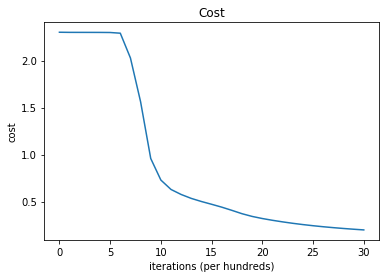

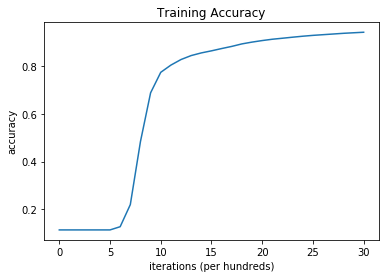

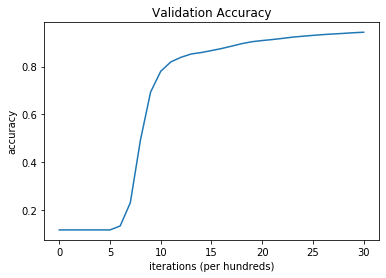

In [34]:
hyperParams = init_hyperParams(alpha = 0.1,ite = 3000)
layers_dim = init_layers()
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams)

In [35]:
predicted_labels_train, prediction_prob_train,train_acc = predict(train_x_norm, train_y_encoded,parameters)
print("\nAccuracy: "  + str(train_acc*100)+"%")
print("\nError:\t"+str((1-train_acc)*100)+"%")


Accuracy: 94.36166666666666%

Error:	5.638333333333334%


In [36]:
predicted_labels_dev, prediction_prob_dev, dev_acc = predict(dev_x_norm,dev_y_encoded,parameters)
print("\nAccuracy: "  + str(dev_acc*100)+"%")
print("\nError:\t"+str((1-dev_acc)*100)+"%")


Accuracy: 94.28%

Error:	5.720000000000002%


In [37]:
predicted_labels_test, prediction_prob_test, test_acc = predict(test_x_norm, test_y_encoded,parameters)
print("\nAccuracy: "  + str(test_acc*100)+"%")
print("\nError:\t"+str((1-test_acc)*100)+"%")


Accuracy: 93.72%

Error:	6.279999999999997%


#### Confusion Matrix

In [38]:
def confusion_matrix(y_orig,y_predicted):
    m = y_orig.shape[0]
    k = len(np.unique(y_orig)) # or simply take k =10
    
    cm = np.zeros((k,k))

    for i in range(m):
        cm[y_orig[i],y_predicted[i]] += 1
   
    return cm.astype(int)

In [39]:
cm_train = confusion_matrix(train_y_sample,predicted_labels_train.T)
print("\nConfusion Matrix for Training set:\n")
print(cm_train)

cm_dev = confusion_matrix(dev_y_sample,predicted_labels_dev.T)
print("\nConfusion Matrix for Dev set:\n")
print(cm_dev)

cm_test = confusion_matrix(test_y_sample,predicted_labels_test.T)
print("\nConfusion Matrix for Test set:\n")
print(cm_test)


Confusion Matrix for Training set:

[[5747    0   32    8    2   47   31   10   40    6]
 [   1 6588   27   37    4    4    3    9   56   13]
 [  45   36 5604   74   23   12   46   37   67   14]
 [  10   29  144 5642    0  135    7   46   82   36]
 [   5   21   13    0 5553    4   64    7    9  166]
 [  60   11   17   99   14 5026   69   14   75   36]
 [  29   14   26    0   50   65 5712    0   22    0]
 [   9   32   37   26   24    6    1 5925   12  193]
 [  23   88   52   70   22   69   42    5 5398   82]
 [  28   17    7   56  158   18    2  196   45 5422]]

Confusion Matrix for Dev set:

[[478   0   2   0   0   3   3   0   2   1]
 [  0 583   2   1   0   2   1   0   5   1]
 [  3   1 460   6   1   0   4   5   5   1]
 [  1   0   8 437   0   5   0   6  10   2]
 [  3   1   1   0 472   0   6   0   1  14]
 [  6   0   0  10   2 418   4   0  10   6]
 [  2   1   3   0   8   4 470   0   2   0]
 [  1   7   6   3   1   0   0 481   0  20]
 [  0   5   0   6   5  10   5   3 449   2]
 [  5   2   2

In [40]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(10,10))
    im = plt.imshow(cm,cmap="GnBu") #RdYlGn, PiYG, Accent,Blues,viridis, YlGnBu


    fig.colorbar(im,ax=ax,fraction=0.045)
    # ax.set_aspect('auto')

#     ax.set_title("Confusion Matrix",fontsize=24)
    ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,10))
    ax.set_xlabel("Predicted", fontsize = 20)
    ax.set_ylabel("Expexted", fontsize = 20)

    ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9],fontsize=16)
    ax.set_yticklabels([0,1,2,3,4,5,6,7,8,9],fontsize=16)

    #setting horizontal axes labeling to top.
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')


    # Turn off all the ticks
    ax.tick_params(top=False,left=False)


    thres = cm.max()//2

    for i in range(10):
        for j in range(10):
            per = cm[i,j]/cm.sum() * 100
            text = ax.text(j, i, "%d\n%.2f%%"%(cm[i, j], per),
                           ha="center", va="center", color="w" if cm[i,j] > thres else "black")


    fig.tight_layout()
    plt.show()


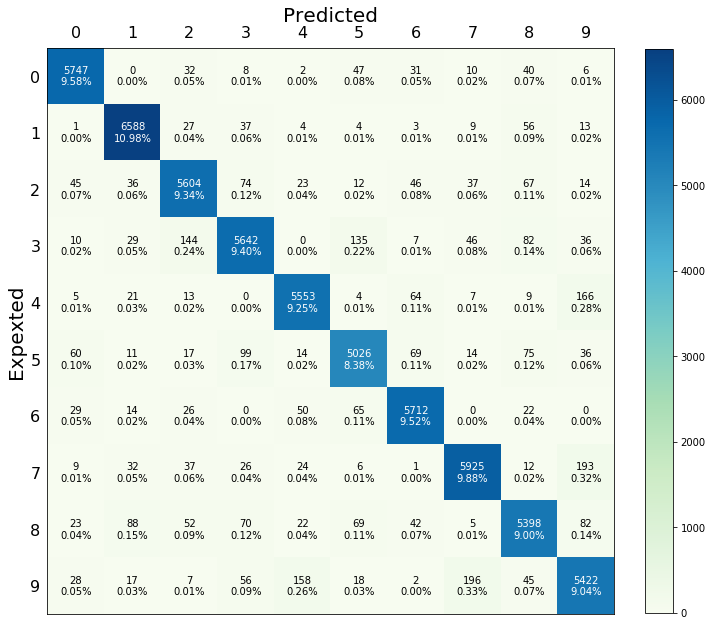

In [41]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train)

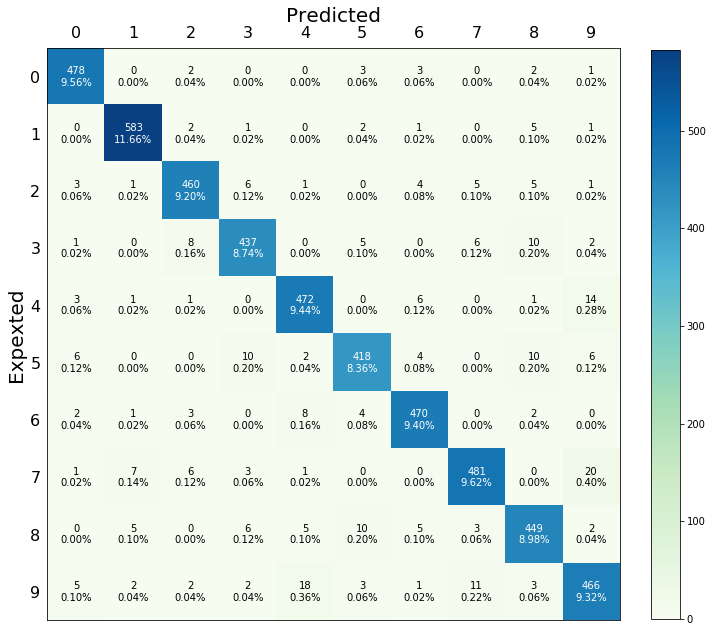

In [42]:
plot_confusion_matrix(cm_dev)

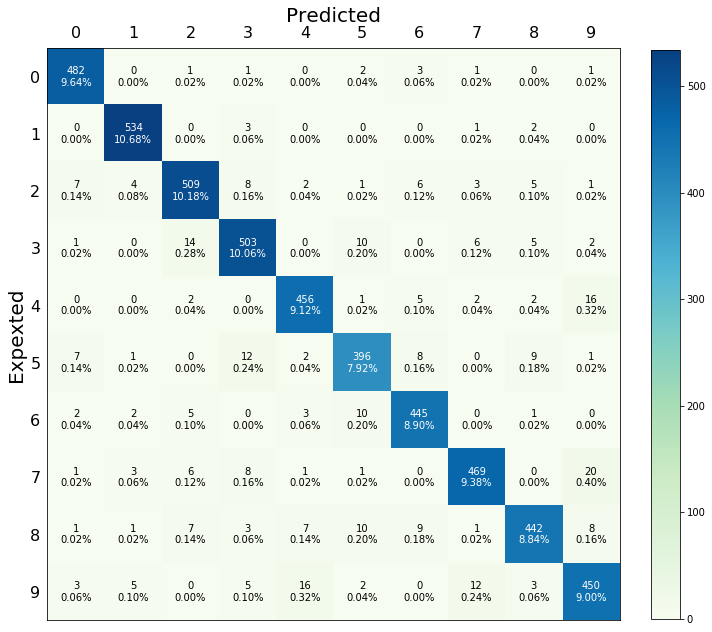

In [43]:
plot_confusion_matrix(cm_test)

In [44]:
def precision(label, cm):
    col = cm[:, label]
    prec = cm[label, label] / col.sum()
    return prec
    
def recall(label, cm):
    row = cm[label, :]
    rec = cm[label, label] / row.sum()
    return rec

def precision_average(prec):
    count = len(prec)    
    prec_mac_avg = np.sum(prec) / count
    return prec_mac_avg

def recall_average(rec):
    count = len(rec)
    rec_mac_avg = np.sum(rec) / count
    return rec_mac_avg

def accuracy(cm):
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    acc = diagonal_sum / sum_of_all_elements 
    return acc

def f1_score(prec,rec):
    f1 = (2 * prec * rec) / (prec + rec)
    return f1

def summary(cm):
    print("+=======+===============+===============+==========+")
    print("| Label\t| Precision \t| Recall \t| F1 Score |")
    print("+=======+===============+===============+==========+")
    prec = []
    rec = []
    f1 = []
    for label in range(10):
        prec.append(precision(label, cm))
        rec.append(recall(label, cm))
        f1.append(f1_score(prec[label], rec[label]))
        print("| %d \t|  %.3f \t|  %.3f \t|  %.3f   |"%(label, prec[label], rec[label], f1[label]))


    print("+=======+===============+===============+==========+") 
    avg_precision = precision_average(prec)
    avg_recall = recall_average(rec)
    acc = accuracy(cm)
    print("\nAvg Precision:\t"+ str(avg_precision) )
    print("Avg Recall:\t"+ str(avg_recall) )
    print("Accuracy:\t"+ str(acc))
# plt.bar(range(0,10),p)

In [45]:
summary(cm_train)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.965 	|  0.970 	|  0.968   |
| 1 	|  0.964 	|  0.977 	|  0.970   |
| 2 	|  0.940 	|  0.941 	|  0.941   |
| 3 	|  0.938 	|  0.920 	|  0.929   |
| 4 	|  0.949 	|  0.951 	|  0.950   |
| 5 	|  0.933 	|  0.927 	|  0.930   |
| 6 	|  0.956 	|  0.965 	|  0.960   |
| 7 	|  0.948 	|  0.946 	|  0.947   |
| 8 	|  0.930 	|  0.923 	|  0.926   |
| 9 	|  0.909 	|  0.911 	|  0.910   |
+=======+===============+===============+==========+

Avg Precision:	0.9431797323510359
Avg Recall:	0.9430846992072344
Accuracy:	0.9436166666666667


In [46]:
summary(cm_dev)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.958 	|  0.978 	|  0.968   |
| 1 	|  0.972 	|  0.980 	|  0.976   |
| 2 	|  0.950 	|  0.947 	|  0.948   |
| 3 	|  0.940 	|  0.932 	|  0.936   |
| 4 	|  0.931 	|  0.948 	|  0.939   |
| 5 	|  0.939 	|  0.917 	|  0.928   |
| 6 	|  0.951 	|  0.959 	|  0.955   |
| 7 	|  0.951 	|  0.927 	|  0.939   |
| 8 	|  0.922 	|  0.926 	|  0.924   |
| 9 	|  0.908 	|  0.908 	|  0.908   |
+=======+===============+===============+==========+

Avg Precision:	0.9422436188099301
Avg Recall:	0.9420187866226077
Accuracy:	0.9428


In [47]:
summary(cm_test)

+=======+===============+===============+==========+
| Label	| Precision 	| Recall 	| F1 Score |
+=======+===============+===============+==========+
| 0 	|  0.956 	|  0.982 	|  0.969   |
| 1 	|  0.971 	|  0.989 	|  0.980   |
| 2 	|  0.936 	|  0.932 	|  0.934   |
| 3 	|  0.926 	|  0.930 	|  0.928   |
| 4 	|  0.936 	|  0.942 	|  0.939   |
| 5 	|  0.915 	|  0.908 	|  0.911   |
| 6 	|  0.935 	|  0.951 	|  0.943   |
| 7 	|  0.947 	|  0.921 	|  0.934   |
| 8 	|  0.942 	|  0.904 	|  0.923   |
| 9 	|  0.902 	|  0.907 	|  0.905   |
+=======+===============+===============+==========+

Avg Precision:	0.9366732867590736
Avg Recall:	0.9366371511792867
Accuracy:	0.9372


In [48]:
def visualize_prediction(x_orig, y_orig, predicted_labels, prediction_prob, dataset):
#     print(x_orig.shape,y_orig.shape, predicted_labels.shape)
    if(dataset == "training"):
        visual_title = "Sample Training Data Set"
        rng = range(30,40)
    elif(dataset == "dev"):
        visual_title = "Sample Dev Data Set"
        rng = range(110,120)
    elif(dataset == "test"):
        visual_title = "Sample Test Data Set"
        rng = range(110,120)        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),rng):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest', cmap='Greys')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

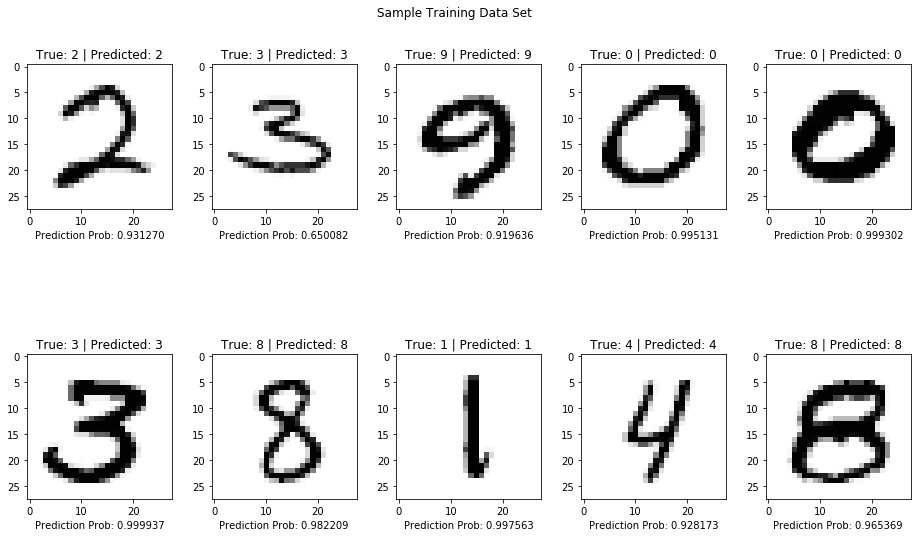

In [49]:
visualize_prediction(train_x_sample, train_y_sample.T,predicted_labels_train, prediction_prob_train,dataset = "training")

In [50]:
def visualize_mislabelled_images(x_orig,y_orig,predicted_labels,prediction_prob,dataset):
    true_prediction = np.equal(predicted_labels,y_orig)
    mislabelled_indices = np.asarray(np.where(true_prediction == False))
#     print(mislabelled_indices)
    print("Total Mislabelled Images: "+str(len(mislabelled_indices[0])))
    
    if(dataset == "training"):
        visual_title = "Sample Mislabelled Training Images"
    elif(dataset == "dev"):
        visual_title = "Sample Mislabelled Dev Images"
    elif(dataset == "test"):
        visual_title = "Sample Mislabelled Test Images"
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),mislabelled_indices[1]):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

Total Mislabelled Images: 3383


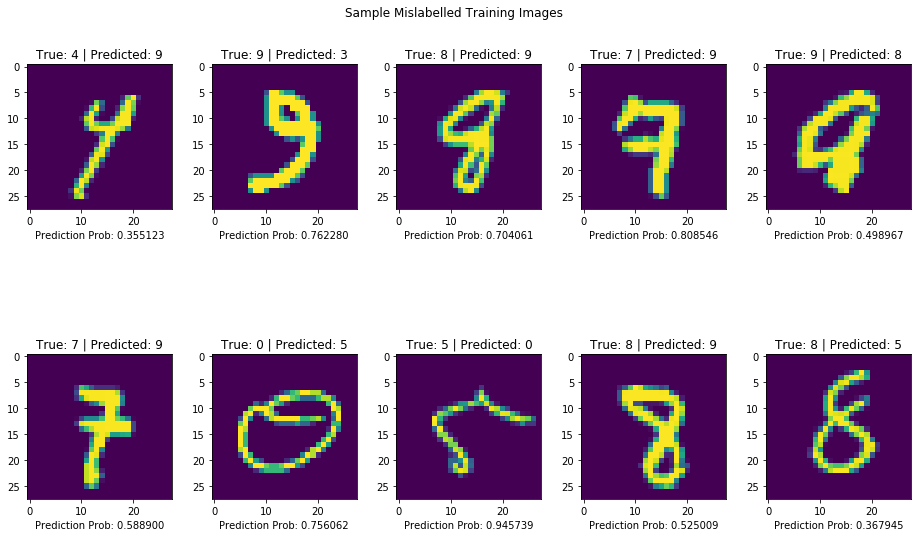

In [51]:
visualize_mislabelled_images(train_x_sample, train_y_sample.T,predicted_labels_train, prediction_prob_train,dataset = "training")

### Predicting Real Time images

In [52]:
from PIL import Image
from dataPrep import one_hot_encoding

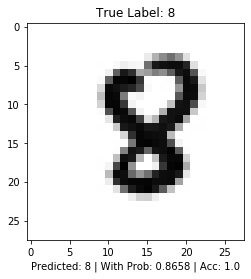

In [53]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

# image_data = np.asarray(plt.imread(fname))
image_data = 255- np.asarray(Image.open(fname).convert('L').resize((28,28)))
# print(image_data)
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
# print(image_flattened.shape)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)
# print(label_encoded)

pridected_label,pred_prob,acc = predict(image_norm, label_encoded, parameters)

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("Predicted: %d | With Prob: %.4f | Acc: %.1f"%(pridected_label.squeeze(), pred_prob.squeeze(),acc))
plt.imshow(image_data, interpolation ='nearest',cmap='Greys')


## Save and Load Model

In [72]:
import pickle

def save_model(file_name, parameters):
    
        with open(file_name ,'wb') as output_file:
            pickle.dump(parameters,output_file)

In [73]:
save_model(file_name = "base_model", parameters = parameters)

In [74]:
def load_model(file_name):
    try: 
        with open(file_name ,'rb') as input_file:
            parameters = pickle.load(input_file)
        
        return parameters
    
    except(OSError, IOError) as e:
        print(e)

In [75]:
loaded_params = load_model(file_name = "base_model")
print(type(loaded_params), type(parameters))

<class 'dict'> <class 'dict'>


In [76]:
predicted_labels_test, prediction_prob_prob,test_acc = predict(test_x_norm, test_y_encoded,loaded_params)
print("\nAccuracy: "  + str(test_acc))
print("\nError:\t"+str(1-test_acc))


Accuracy: 0.9372

Error:	0.06279999999999997


In [77]:
predicted_labels_dev, prediction_prob_dev, dev_acc = predict(dev_x_norm,dev_y_encoded,loaded_params)
print("\nAccuracy: "  + str(dev_acc))
print("\nError:\t"+str(1-dev_acc))


Accuracy: 0.9428

Error:	0.05720000000000003
